In [1]:
#hide
# !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# From Model to Production

In [78]:
bear_types = 'grizzly' ,'black','teddy'
path = Path('bears')
print(bear_types)

('grizzly', 'black', 'teddy')


In [134]:
import time

for o in bear_types:
    print(o)
    dest = (path/o)
    print(dest)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f'{o} bear', max_images=100)
    for counter, url in enumerate(urls):
        #print(urls[0])
        try:
            download_url(url, f'{dest}/{counter}.jpg' )
            print(counter)
            #time.sleep(0.1)
            #print(counter)
        
            #results = search_images_bing(key, f'{o} bear')
            #download_images(dest, urls=results.attrgot('contentUrl'))
        except:
            print('image error')
 


grizzly
bears/grizzly
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


25
26
27
28
29
30
31
32
33
34


35
36
37
38
39


40


41


42


43
44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99
black
bears/black
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


40


41


42


43


44


45


46


47


48


49


50
51


52


53
image error


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91
image error


93


94


95


96


97


98


99
teddy
bears/teddy
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


40


41


42


43


44


45


46


47


48


49
image error


51
52


53


54


55


56


57


58


59


60


61


62


63


64


65
66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84
85


86


87


88


89
90


91


92


93


94


95


96


97
image error


99


# Han Solo

In [6]:
path = Path('bears')

In [161]:
import time



dest = (path/'solo')
print(dest)
dest.mkdir(exist_ok=True)
urls = search_images_ddg('han solo', max_images=100)
for counter, url in enumerate(urls):
    #print(urls[0])
    try:
        download_url(url, f'{dest}/{counter}.jpg' )
        print(counter)
        #time.sleep(0.1)
        #print(counter)

        #results = search_images_bing(key, f'{o} bear')
        #download_images(dest, urls=results.attrgot('contentUrl'))
    except:
        print('image error')
 


bears/solo


0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47
48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66
image error


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


In [8]:
fns = get_image_files(path)
fns

(#382) [Path('bears/grizzly/0.jpg'),Path('bears/grizzly/1.jpg'),Path('bears/grizzly/2.jpg'),Path('bears/grizzly/3.jpg'),Path('bears/grizzly/4.jpg'),Path('bears/grizzly/5.jpg'),Path('bears/grizzly/6.jpg'),Path('bears/grizzly/7.jpg'),Path('bears/grizzly/8.jpg'),Path('bears/grizzly/9.jpg')...]

In [10]:
failed = verify_images(fns)
failed

(#1) [Path('bears/solo/24.jpg')]

In [11]:
failed.map(Path.unlink);

# show image

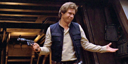

In [14]:
im = Image.open(f'{dest}/87.jpg')
im.to_thumb(128,128)


## From Data to DataLoaders

In [16]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [17]:
dls = bears.dataloaders(path)

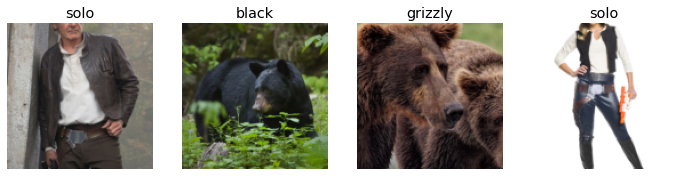

In [18]:
dls.valid.show_batch(max_n=4, nrows=1)

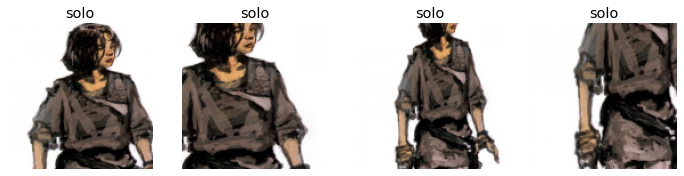

In [20]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

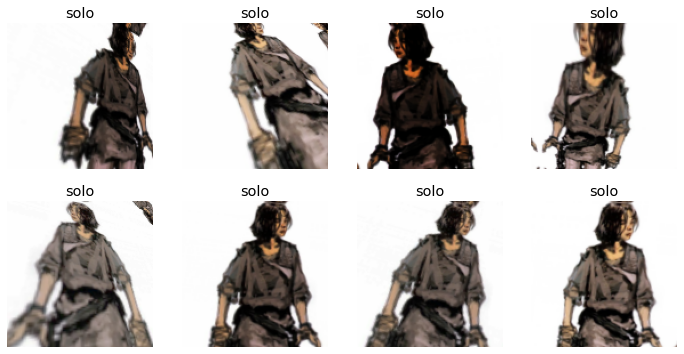

In [21]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [24]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [25]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.722902,0.495017,0.250000,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.278119,0.065019,0.013158,00:13
1,0.189273,0.012609,0.013158,00:12
2,0.133856,0.006309,0.000000,00:12
3,0.100906,0.003611,0.000000,00:11


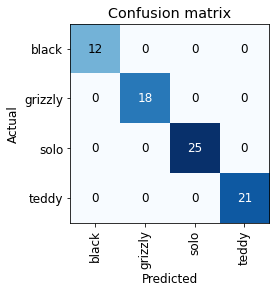

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

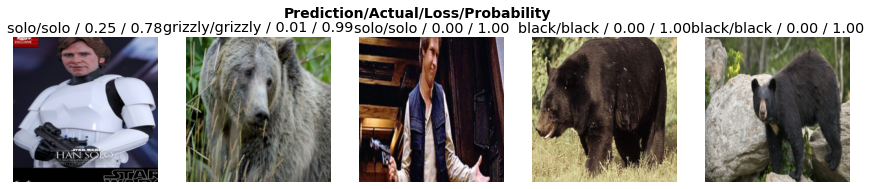

In [27]:
interp.plot_top_losses(5, nrows=1)

In [28]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [29]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

# export learner

In [30]:
learn.export()

In [31]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

# import learner 

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [34]:
learn_inf.predict('bears/grizzly/20.jpg')

('grizzly',
 tensor(1),
 tensor([3.0935e-06, 9.9998e-01, 1.4402e-05, 6.4389e-06]))

In [35]:
learn_inf.dls.vocab

['black', 'grizzly', 'solo', 'teddy']

### Creating a Notebook App from the Model

In [53]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [54]:
img = PILImage.create(btn_upload.data[-1])

In [55]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [56]:
pred,pred_idx,probs = learn_inf.predict(img)

In [57]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: solo; Probability: 0.9999')

In [58]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [59]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [60]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [61]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [62]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.9 MB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 56.3 MB/s eta 0:00:01
     |████████████████████████████████| 227 kB 69.8 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 3.2 MB/s  eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.4 OK


### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.